# k-Nearest Neighbors

***

## Importando as bibliotecas

In [ ]:
pip install mlxtend

In [7]:
# Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Classes do modelo de aprendizado
from sklearn.neighbors import KNeighborsClassifier

# Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Análise do conjunto de dados

In [11]:
#carregando o csv
dataset = pd.read_csv("https://raw.githubusercontent.com/cynthiamaia/MonitoriaEmbraer/main/Datasets/Iris.csv")

**Dataset Iris**

<img src="https://miro.medium.com/v2/resize:fit:1000/1*nfK3vGZkTa4GrO7yWpcS-Q.png" alt="Iris" width="600"/>

In [18]:
dataset.shape

(150, 5)

In [19]:
# Coluna com as features
target_col = "Species"
print("Quantas classes existem nesse dataset?\n%d" %(len(dataset[target_col].unique())))
print("\nQuantas instâncias existem no dataset?\n%d" %(dataset.shape[0]))
print("\nQuantas features existem no dataset?\n%d" % (dataset.shape[1]-1))
print("\nQue features são essas?\n%s" % (str([k for k in dataset.keys() if k != target_col])))
print("\nQual o numero de instâncias por classe?")
print(dataset[target_col].value_counts())

Quantas classes existem nesse dataset?
3

Quantas instâncias existem no dataset?
150

Quantas features existem no dataset?
4

Que features são essas?
['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

Qual o numero de instâncias por classe?
Species
0    50
1    50
2    50
Name: count, dtype: int64


In [20]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


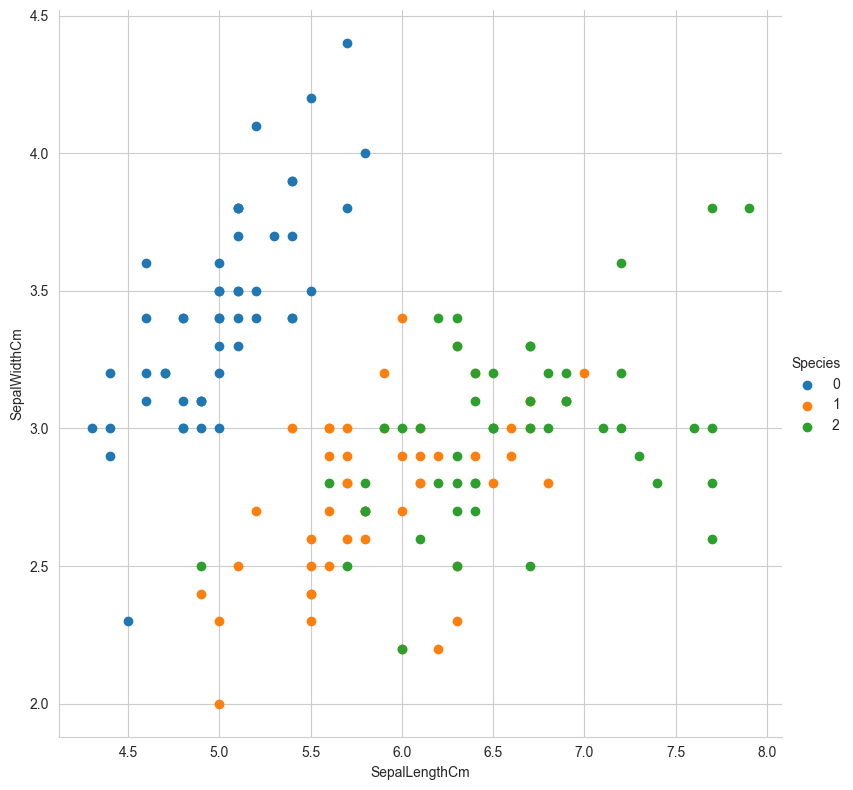

In [21]:
# Distribuição das classes pelas features SepalLengthCm e SepalWidthCm
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue ="Species", 
              height = 8).map(plt.scatter,
                              'SepalLengthCm',
                              'SepalWidthCm').add_legend()

In [22]:
# Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
dataset['Species'] = pd.factorize(dataset['Species'])[0]

# Setosa - 0
# Versicolor - 1
# Virginica - 2
     

### Separando o conjunto de dados 

In [23]:
#Vamos usar somente duas features SepalLengthCm e SepalWidthCm
#loc - (rotulos) e iloc- (indices)
X = dataset.loc[:,["SepalLengthCm", "SepalWidthCm"]] 
y = dataset.loc[:,["Species"]]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Treinamento do modelo

In [24]:
# vamos criar um classificador kNN com k=5
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# e ver a sua performance no dataset de teste
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.62      0.68      0.65        19
           2       0.62      0.56      0.59        18

    accuracy                           0.69        45
   macro avg       0.75      0.75      0.75        45
weighted avg       0.69      0.69      0.69        45



**Métricas**

*   **Precision** - $\frac{tp}{(tp + fp)}$
*   **Recall** - $\frac{tp}{(tp + fn)}$ 
*   **F1-score** - $2 * \frac{(precision * recall)}{(precision + recall)}$
*   **Accuracy** - $\frac{C}{T}$
*   **Macro avg** - Calcule as métricas para cada rótulo e encontre sua média não ponderada.
*   **Weighted avg** - Calcule as métricas para cada rótulo e encontre sua média ponderada pelo suporte (o número de instâncias verdadeiras para cada rótulo).


**tp** - verdadeiros positivos

**fp** - falsos positivos

**fn** - falsos negativos

**C** - Número de predições corretas

**T** - Número total de predições

### Região de decisão

In [25]:
def show_decision_region(X, y, model):
    feature_0 = X.columns[0]
    feature_1 = X.columns[1]

    plot_decision_regions(np.array([X[feature_0].values,
                                    X[feature_1].values]).T,
                                    y.values.flatten(), model)
    plt.xlabel(feature_0)
    plt.ylabel(feature_1)

    plt.title(model.__class__.__name__ + " k = " + str(model.n_neighbors))
    plt.show()

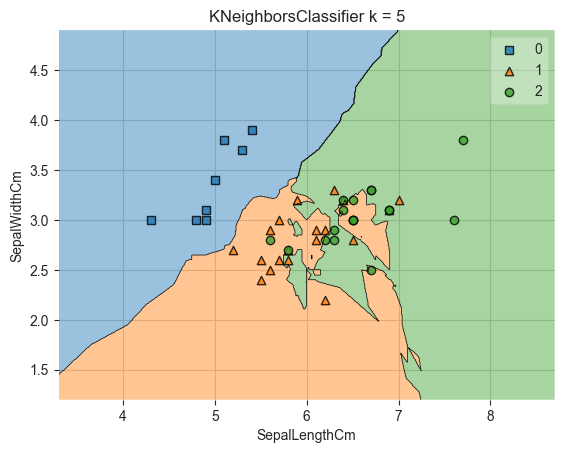

In [26]:
# região de decisão com o tamanho da vizinhança para o kNN
show_decision_region(X_test, y_test, model)

## Análise dos parâmetros

### Tamanho da vizinhança

n_neighbors <= número de exemplos  e n_neighbors >= 1

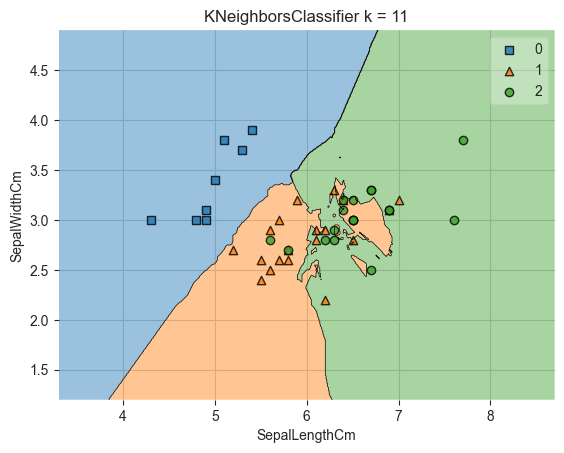

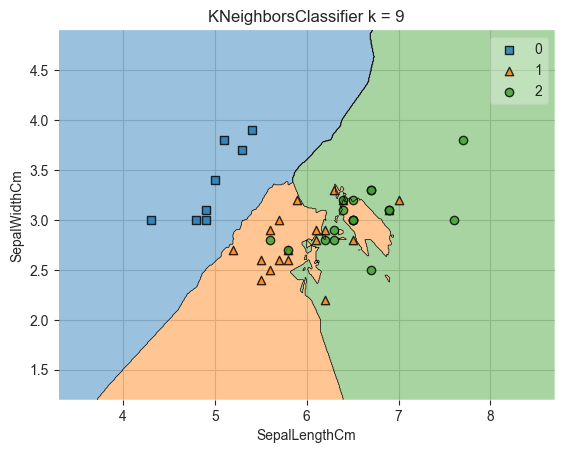

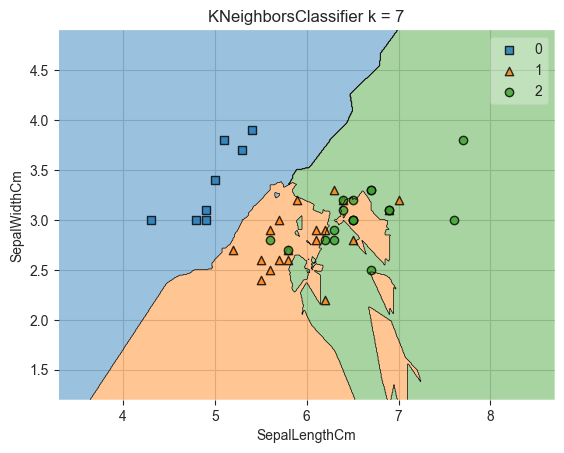

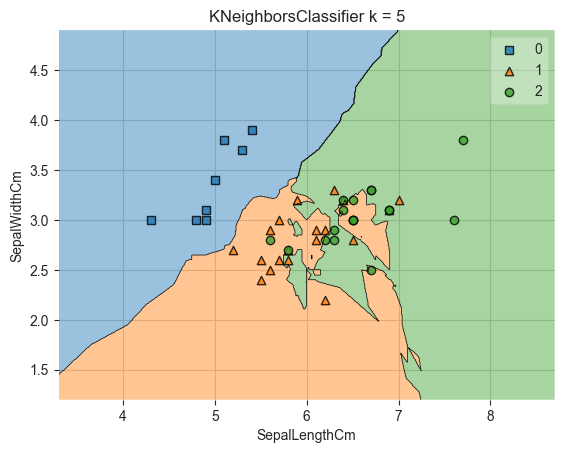

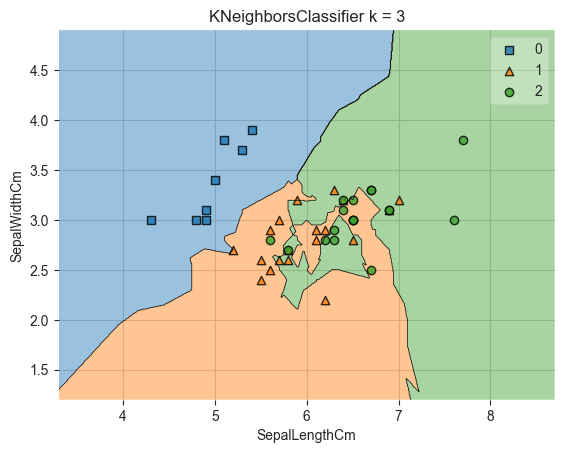

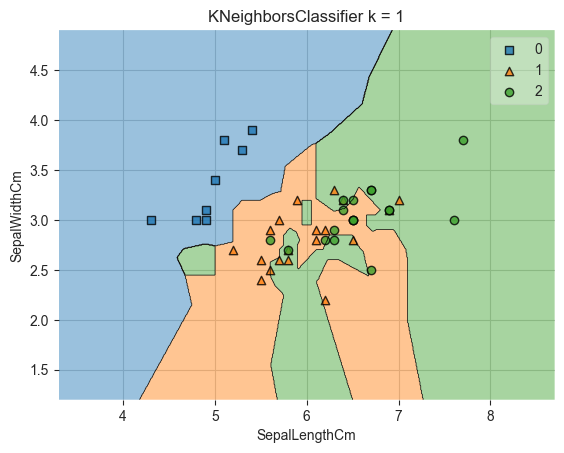

In [27]:
for k in [11, 9, 7, 5, 3, 1]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # performance no dataset de teste
    show_decision_region(X_test, y_test, model)

### Medida de distância

Também podemos mudar a métrica utilizada para calcular a distância entre as amostras.

O hiperparâmetro _metric_ pode assumir dois tipos diferentes, uma _string_ ou uma função. Caso o valor seja uma _string_, as possíveis funções de distâncias estão presentes [aqui](https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html). Entretanto, você também pode criar uma função que calcula a distância entre métricas.

Vamos definir duas distâncias diferentes, a distância Euclidiana e a distância Manhattan:

- Manhattan: $D_M(x, y) = \sum_{i=1}^{d}|x_i-y_i|$

- Euclidiana: $D(x, y) = \sqrt{\sum_{i=1}^{d}(x_i-y_i)^2}$

In [28]:
# vamos implementar a distância manhattan com pesos diferentes para cada uma das features
def manhattan_custom_distance(x, y, weights=np.array([2, 1])):
    return (abs(x - y)*weights).sum()

--------------------
euclidean
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.62      0.68      0.65        19
           2       0.62      0.56      0.59        18

    accuracy                           0.69        45
   macro avg       0.75      0.75      0.75        45
weighted avg       0.69      0.69      0.69        45



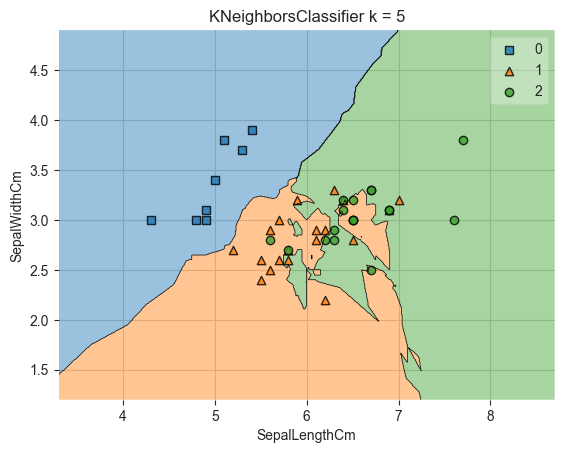

--------------------
manhattan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.68      0.68      0.68        19
           2       0.67      0.67      0.67        18

    accuracy                           0.73        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.73      0.73      0.73        45



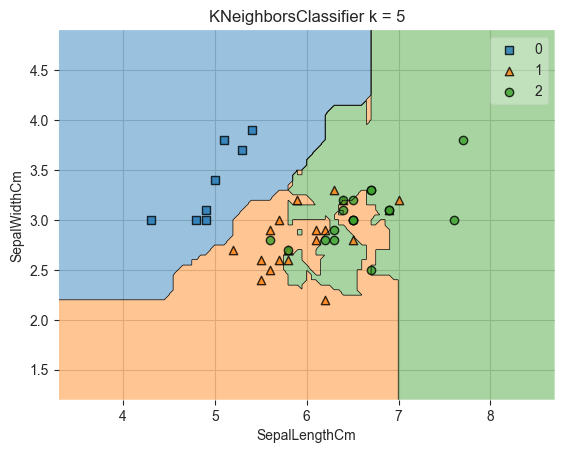

--------------------
<function manhattan_custom_distance at 0x289bbb1a0>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.65      0.68      0.67        19
           2       0.65      0.61      0.63        18

    accuracy                           0.71        45
   macro avg       0.77      0.77      0.77        45
weighted avg       0.71      0.71      0.71        45



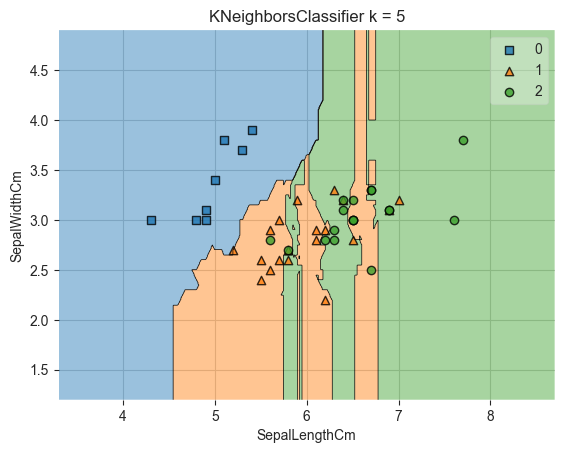

In [29]:
for m in ["euclidean", "manhattan", manhattan_custom_distance]:
    print("-"*20)
    print(str(m))

    model = KNeighborsClassifier(n_neighbors=5, metric=m)
    model.fit(X_train, y_train)

    # performance no dataset de test
    print(classification_report(y_test, model.predict(X_test)))

    show_decision_region(X_test, y_test, model)